In [1]:
#importing the modulesimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFECV



#collect the data and load them


In [2]:
file_path = os.path.join('..', 'data', 'Student_Performance.csv') 
data=pd.read_csv(file_path)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


Data preprocessing 


In [3]:
# Convert categorical values into numerical or boolean values
new_data = pd.get_dummies(data, drop_first=True)
new_data.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,NaN,1,91,True
1,4,82,4.0,2,65,False
2,8,51,7.0,2,45,True
3,5,52,5.0,2,36,True
4,7,75,NaN,5,66,False


In [5]:
#check the missing values and get the sum of them
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
#filling the missing values with according column mean or median
new_data.fillna(new_data.mean(),inplace=True)
new_data.head()
#find the duplictae datasets and drop them
new_data.drop_duplicates(inplace=True)
print("Duplicate row count : ",new_data.duplicated().sum())


Duplicate row count :  0


Rename the columns and separate the target value and features

In [ ]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]
independent=new_data.drop("Score",axis=1)
dependent=new_data.iloc[:,4]
independent.head()
dependent.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

Analyse relationships between features and target


In [9]:
new_data.describe()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Score
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531253,4.583004,55.216651
std,2.589081,17.325601,1.697437,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


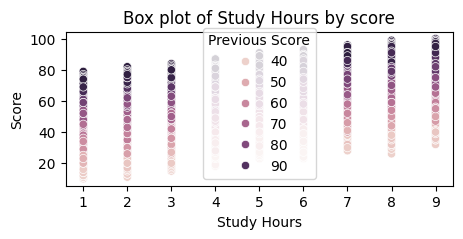

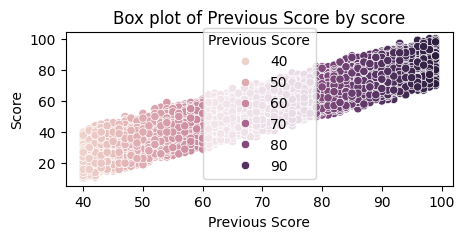

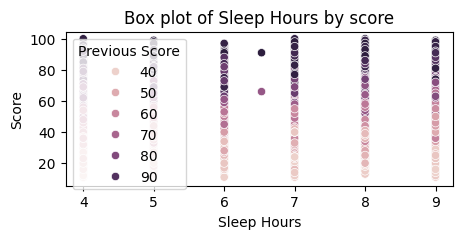

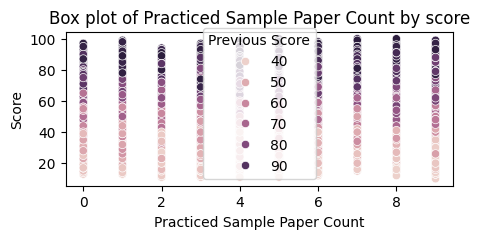

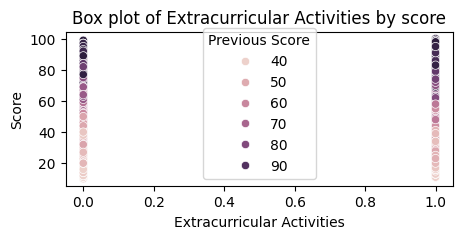

In [18]:
# Plotting scatter between features and targets
for columns in independent.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(x = columns, y = dependent, data = new_data, hue = "Previous Score")
    plt.title(f'Box plot of {columns} by score')
    plt.xlabel(columns)
    plt.ylabel("Score")
    plt.show()

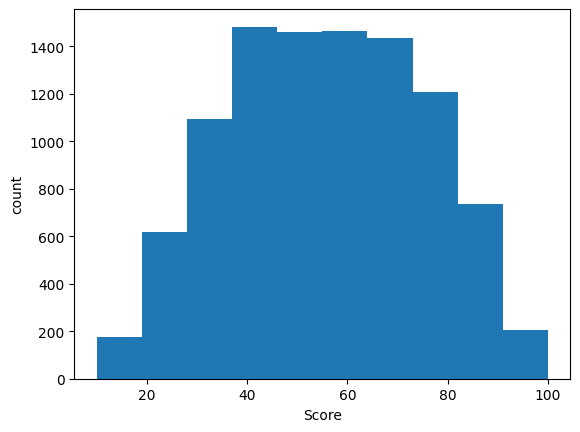

In [17]:
# Plotting score histogram for how many score count Scattered around data
plt.hist(dependent,bins=10)
plt.xlabel("Score")
plt.ylabel("count")
plt.show()